Лабораторная работа2. Визуализация данных.
Цель лабораторной работы: изучение программных средств для визуализации наборов данных.
Основные задачи:
- установка и настройка matplotlib, seaborn;
-изучение основных типов графиков библиотеки matplotlib;
-изучение основных типов графиков библиотеки seaborn;
данных.
получение навыков анализа данных по визуальным представлениям.

In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
uploaded = files.upload()

Saving telecom_churn.csv to telecom_churn.csv


In [ ]:
data = pd.read_csv('/content/telecom_churn.csv', delimiter = ',')
data.info() # Выводит основную информацию о данных: Количество строк, столбцов. Типы данных (числовые, строковые и т. д.). Количество ненулевых значений в каждом столбце.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

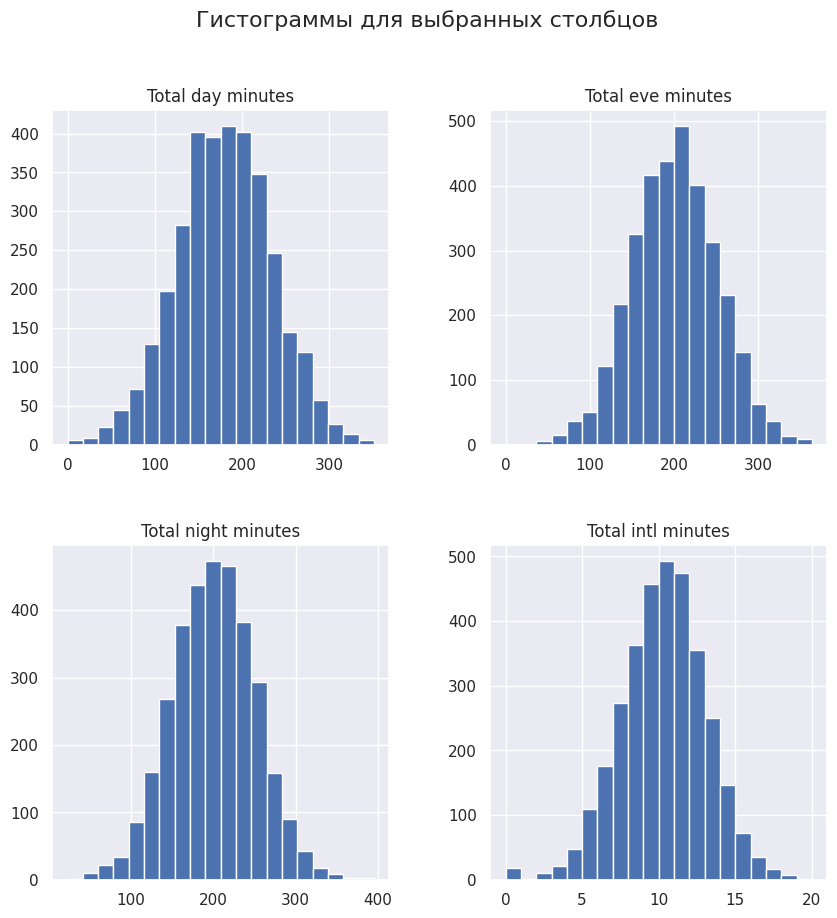

In [ ]:
columns_to_plot = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'] # Список из четырех столбцов для анализа.

data[columns_to_plot].hist(figsize=(10, 10), bins=20) # Строит гистограммы для каждого выбранного столбца, bins - количество столбцов гистограммы
plt.suptitle('Гистограммы для выбранных столбцов', fontsize=16) # Добавляет общий заголовок к графикам
plt.show()

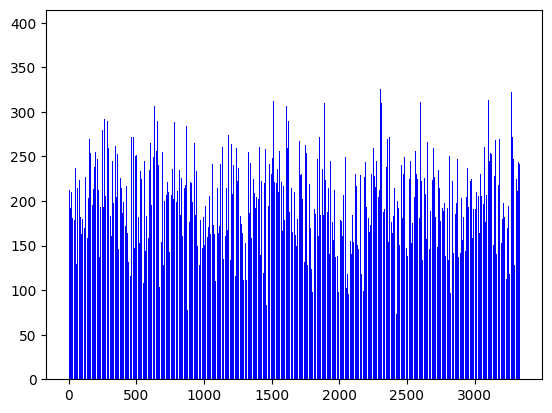

In [ ]:
plt.style.use('default') # Строит столбчатую диаграмму
plt.bar(data.index, data['Total night minutes'], color='blue') # data.index - индексы строк. data['...'] - значения для оси Y.
plt.show()

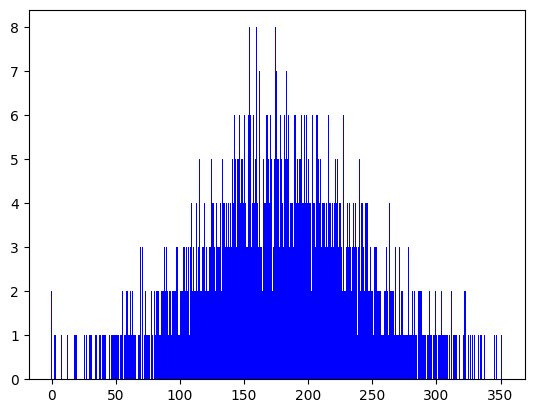

In [ ]:
plt.style.use('default') # стандартный стиль оформления графиков
hist = data['Total day minutes'].value_counts() #  Выбираем столбец Total day minutes из DataFrame. value_counts() - считает, сколько раз каждое уникальное значение встречается в этом столбце.

plt.bar(hist.index, hist, color='blue'); # Строит столбчатую диаграмму. hist.index - значения (на оси X). hist - частоты (высота столбцов, ось Y).

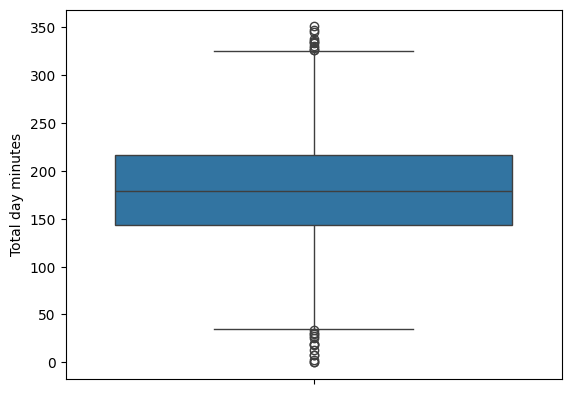

In [ ]:
sns.boxplot(data['Total day minutes']); # Показывает распределение значений. Концы усов: минимальные и максимальные значения

<ipython-input-8-ca9b84d8032b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='State', # Показывает распределение минут по топ-5 штатам.


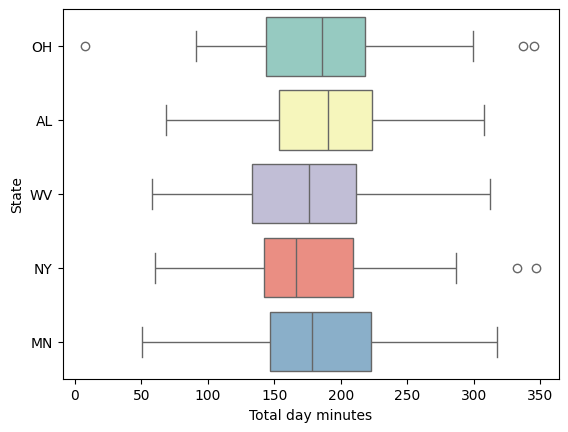

In [ ]:
top_data = data[['State', 'Total day minutes']]
top_data = top_data.groupby('State').sum() # Группирует данные по столбцу State. Вычисляет сумму Total day minutes для каждого штата.
top_data = top_data.sort_values('Total day minutes', ascending=False) # Сортирует штаты по убыванию суммарных минут.
top_data = top_data[:5].index.values
sns.boxplot(y='State', # Показывает распределение минут по топ-5 штатам.
            x='Total day minutes',
            data=data[data. State.isin(top_data)], palette='Set3'); # Отбирает данные только для топ-5 штатов.

In [ ]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'charge' in f] # Находит столбцы, содержащие слово charge в названии.
feats

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

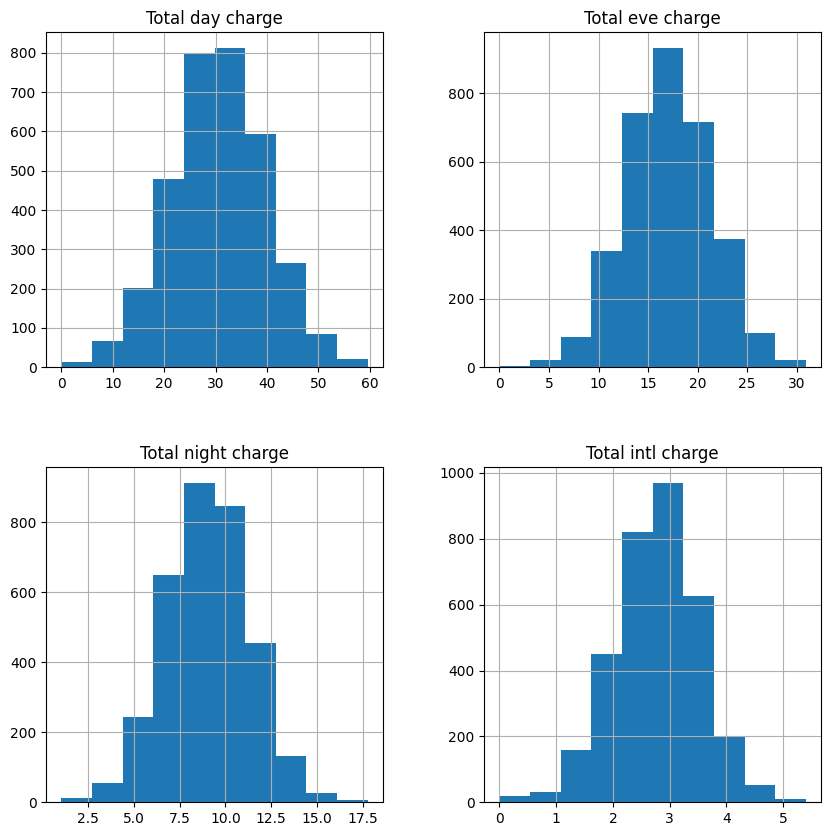

In [ ]:
# строим отдельные гистограммы # для нескольких признаков
data[feats].hist(figsize=(10,10)); # Строит гистограммы для всех столбцов с "charge".

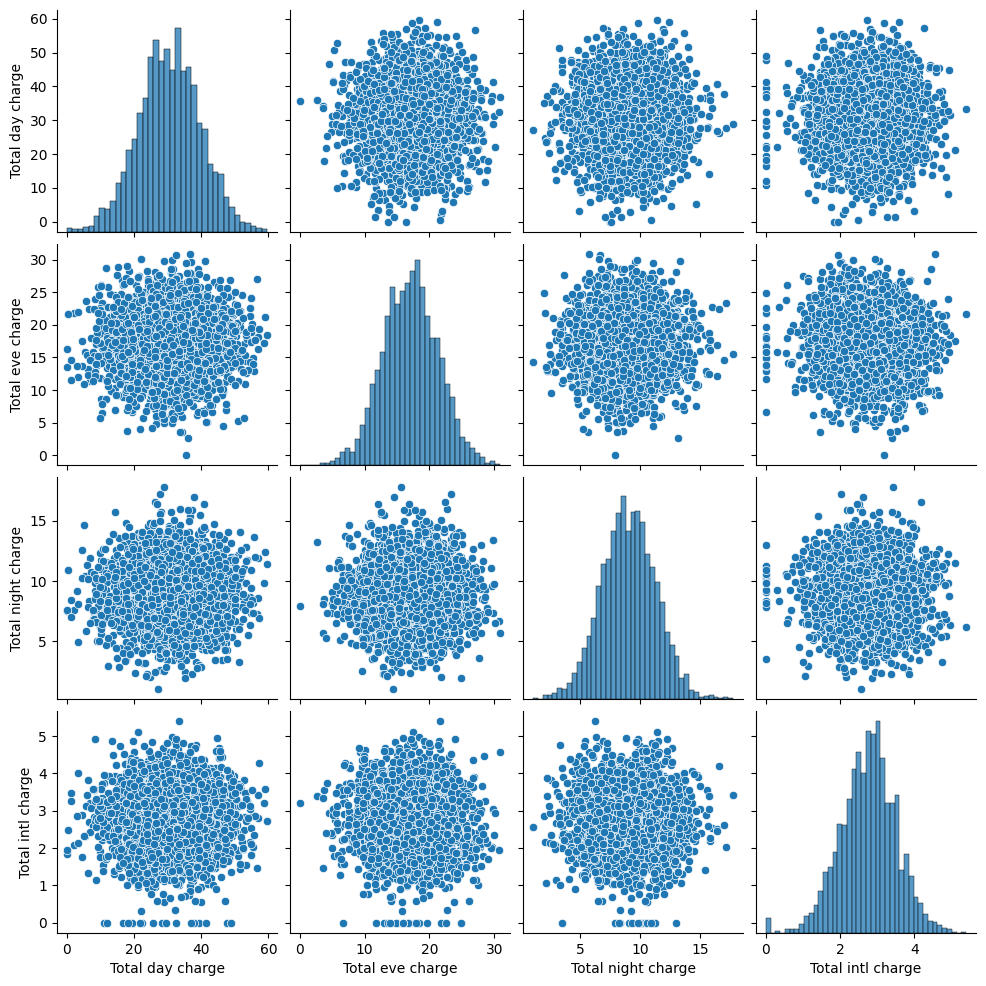

In [ ]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]); # Попарно сравнивает столбцы и создает диаграммы рассеяния.

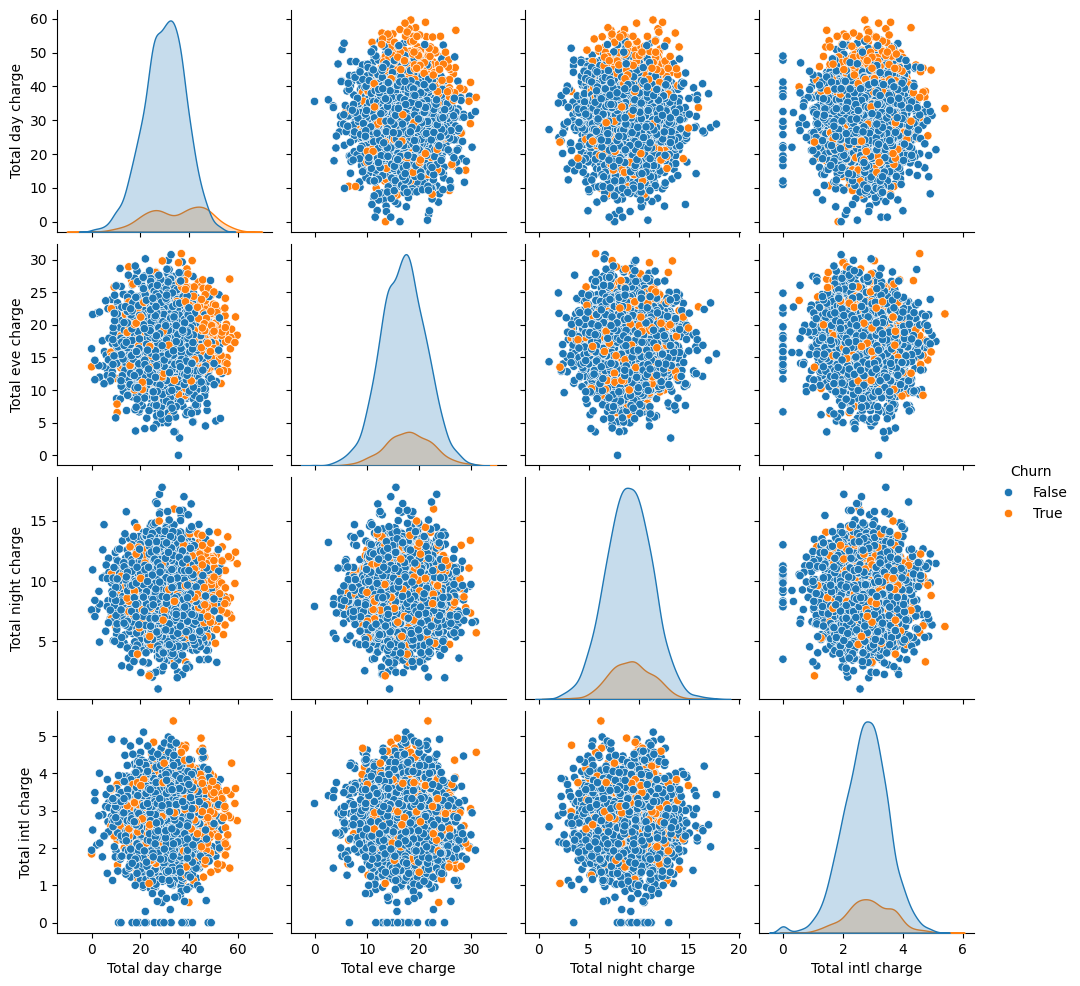

In [ ]:
sns.pairplot(data[feats + ['Churn']], hue ='Churn'); # Попарно сравнивает столбцы и создает диаграммы рассеяния. # цвет точек зависит от столбца Churn.

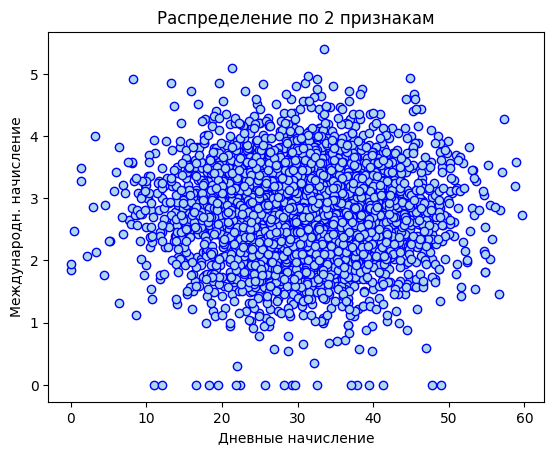

In [ ]:
plt.scatter(data['Total day charge'], # Строит диаграмму рассеяния.
data['Total intl charge'],
color='lightblue', edgecolors='blue')
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение по 2 признакам');

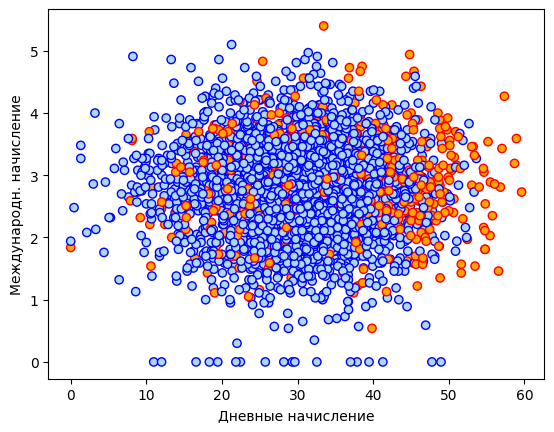

In [ ]:
# Раскрашивание данных
# Цвет в зависимости от ухода клиента
c = data['Churn'].map({False: 'lightblue', True: 'orange'})
edge_c = data['Churn'].map({False: 'blue', True: 'red'})
# Настройка графика
plt.scatter(data['Total day charge'], data['Total intl charge'], color=c, edgecolors=edge_c)
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление');

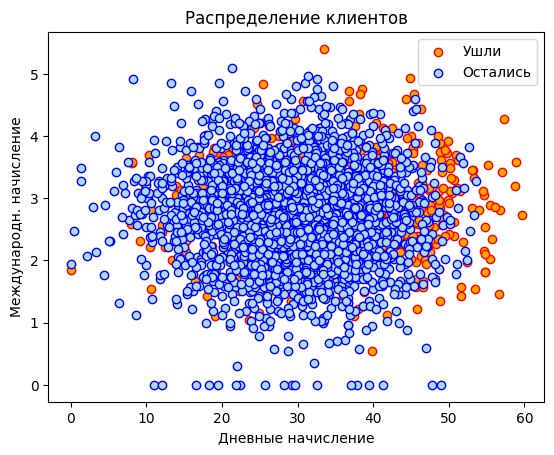

In [ ]:
#Ушедшие клиенты
data_churn = data[data['Churn']] # фильтрует строки, где значение в столбце Churn равно True.
# Оставшиеся клиенты
data_loyal = data[~data['Churn']] # фильтрует строки, где значение в Churn равно False.
plt.scatter(data_churn['Total day charge'], data_churn['Total intl charge'], # Строит диаграмму рассеяния.
color='orange', # цвет точек
edgecolors='red', # цвет контура точек
label='Ушли') # метка точки
plt.scatter(data_loyal['Total day charge'],
data_loyal['Total intl charge'],
color='lightblue',
edgecolors='blue',
label='Остались')
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение клиентов')
plt.legend();

In [ ]:
#Применяется функция corr() из Pandas. Матрица корреляции
correlation_matrix = data.select_dtypes(include=['number']) # Отбирает только числовые столбцы.
correlation_matrix.corr() # Вычисляет корреляции между всеми числовыми столбцами.

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


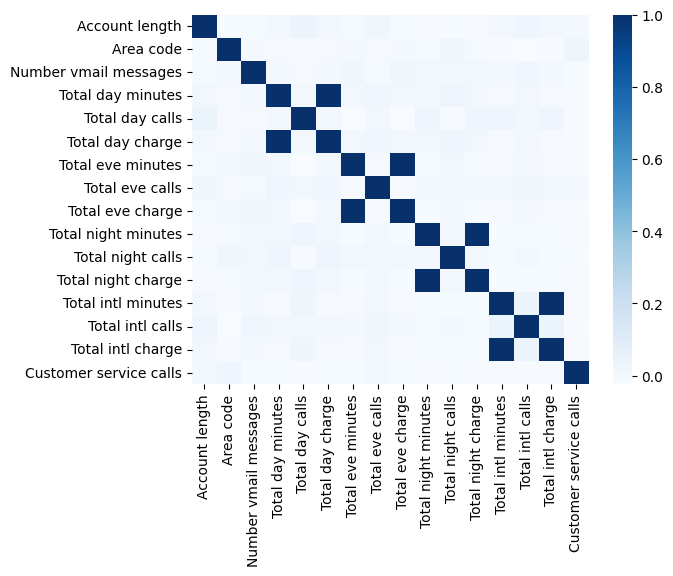

In [ ]:
sns.heatmap(correlation_matrix.corr(), cmap=plt.cm.Blues); # Визуализирует корреляции в виде тепловой карты.

Индивидуальное задание

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv("/content/DKHousingPricesSample100k.csv")

# Первичный анализ
print("Форма данных:", data.shape)  # Размеры данных
print("\nТипы данных:")
print(data.dtypes)  # Типы данных для каждого столбца
print("\nОбзор первых строк:")
print(data.head())  # Первые строки для понимания структуры

# Проверка наличия пропусков
missing_values = data.isnull().sum()
print("\nПропуски в данных:\n", missing_values)


Форма данных: (100000, 19)

Типы данных:
date                                    object
quarter                                 object
house_id                                 int64
house_type                              object
sales_type                              object
year_build                               int64
purchase_price                           int64
%_change_between_offer_and_purchase    float64
no_rooms                                 int64
sqm                                    float64
sqm_price                              float64
address                                 object
zip_code                                 int64
city                                    object
area                                    object
region                                  object
nom_interest_rate%                     float64
dk_ann_infl_rate%                      float64
yield_on_mortgage_credit_bonds%        float64
dtype: object

Обзор первых строк:
         date quarter  house_id

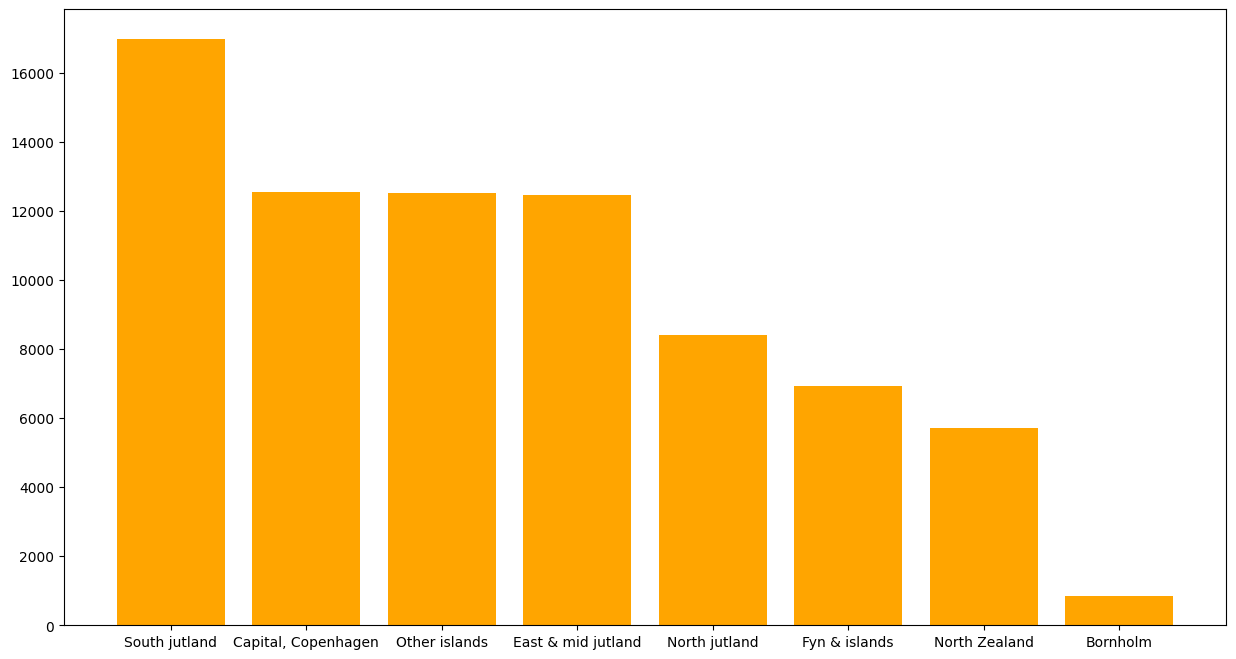

In [ ]:

plt.style.use('default') # стандартный стиль оформления графиков
plt.figure(figsize=(15, 8))
hist = data['area'].value_counts() #  Выбираем столбец area  - считает, сколько раз каждое уникальное значение встречается в этом столбце.

plt.bar(hist.index, hist, color='orange'); # Строит столбчатую диаграмму. hist.index - значения (на оси X). hist - частоты (высота столбцов, ось Y).

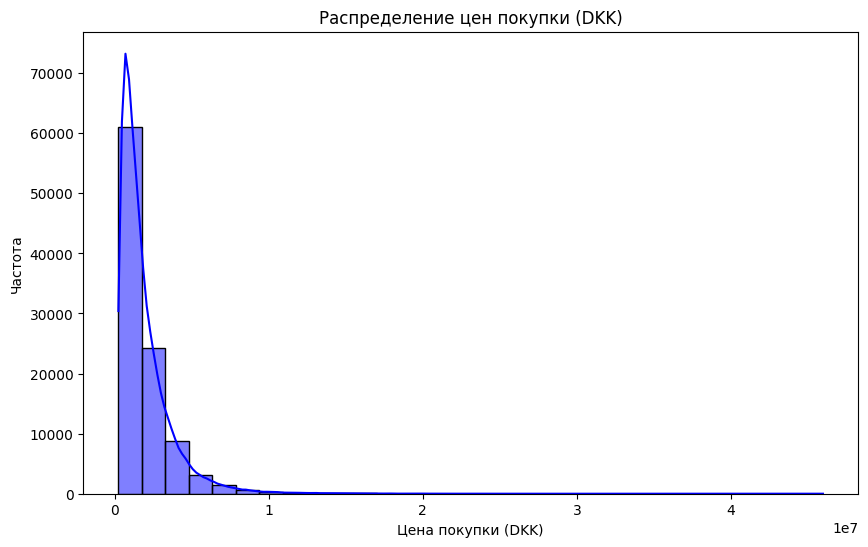

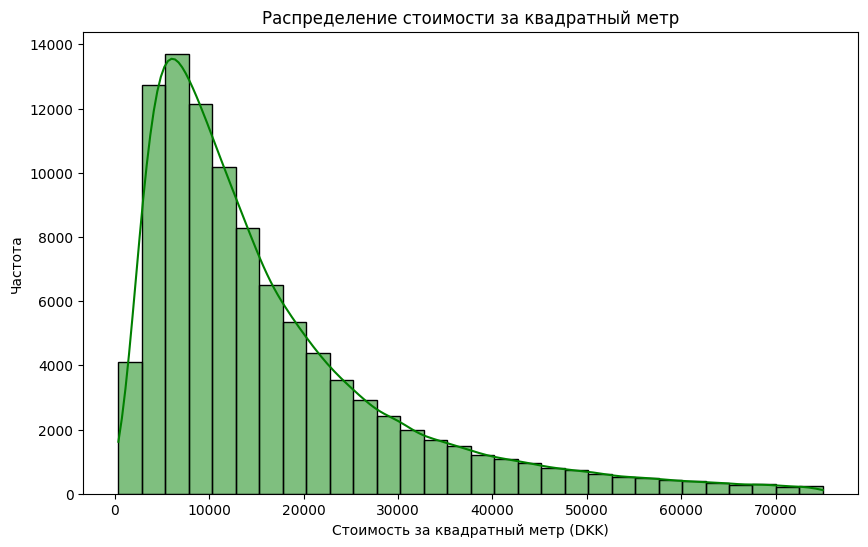

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data["purchase_price"], bins=30, kde=True, color="blue")
plt.title("Распределение цен покупки (DKK)")
plt.xlabel("Цена покупки (DKK)")
plt.ylabel("Частота")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data["sqm_price"], bins=30, kde=True, color="green")
plt.title("Распределение стоимости за квадратный метр")
plt.xlabel("Стоимость за квадратный метр (DKK)")
plt.ylabel("Частота")
plt.show()



Распределение цен покупки (гистограмма), На графике видно, как распределены цены покупки жилья (в датских кронах), можно сделать вывод, что большинство сделок было совершено за низкие суммы, что может говорить о популярности более доступного жилья и чем выше стоимость, тем популярность стремительнее падает.
2.1) Стоимость за квадратный метр(гистрограмма), На графике видно, что большинство сделок было совершено с жильем, у которого цена за квадратный метр меньше, чем выше стоимость за квадратный метр, тем меньше колличество сделок


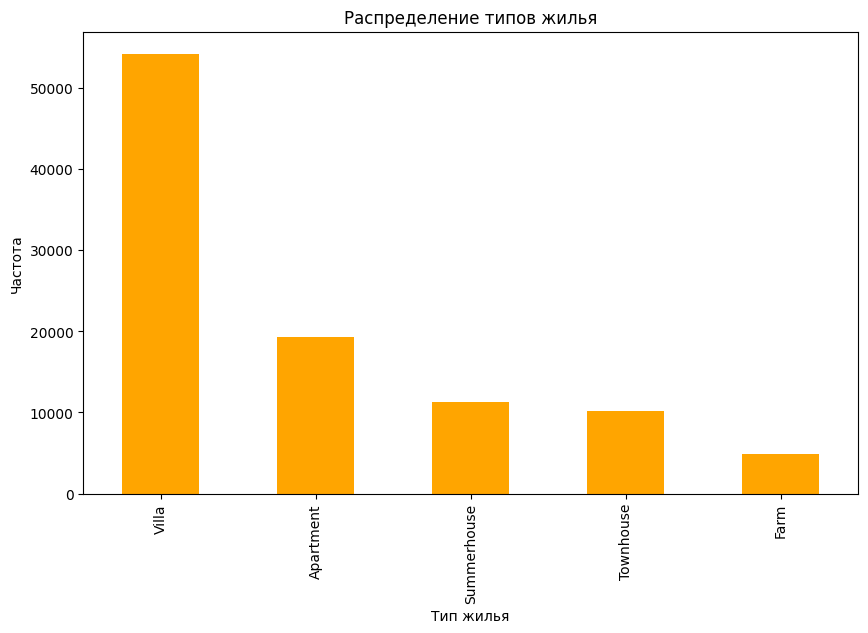

In [ ]:
plt.figure(figsize=(10, 6))
data["house_type"].value_counts().plot(kind="bar", color="orange")
plt.title("Распределение типов жилья")
plt.xlabel("Тип жилья")
plt.ylabel("Частота")
plt.show()


Гистограмма, распределение типов жилья по частоте покупок. На графике видно, что чаще всего покупают виллы, а реже всего - фермы

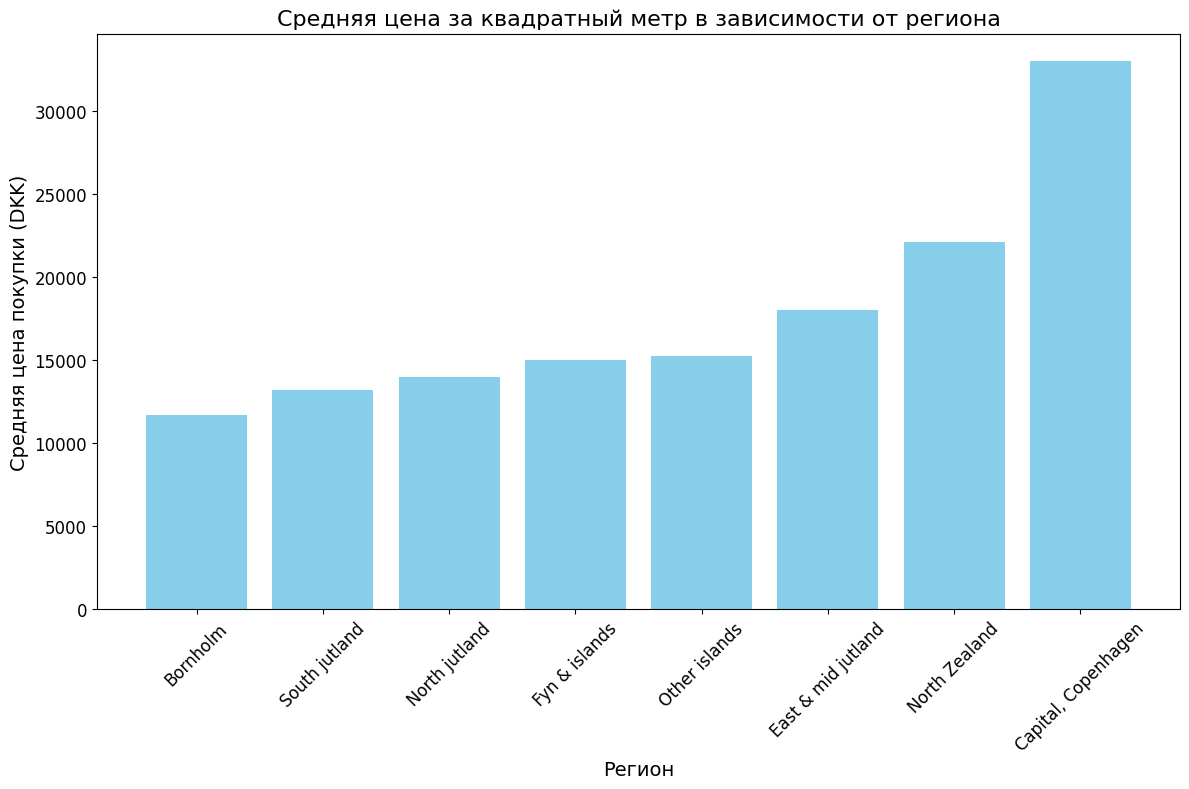

In [ ]:

# Группировка данных по региону (area) и расчет средней цены
grouped_data = data.groupby('area')['sqm_price'].mean().sort_values()

# Построение графика
plt.figure(figsize=(12, 8))
plt.bar(grouped_data.index, grouped_data, color='skyblue')

# Добавление подписей и заголовка
plt.title("Средняя цена за квадратный метр в зависимости от региона", fontsize=16)
plt.xlabel("Регион", fontsize=14)
plt.ylabel("Средняя цена покупки (DKK)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Отображение графика
plt.tight_layout()
plt.show()


Средняя цена за квадратный метр в зависимости от региона(гистограмма). Сделаем вывод по графику, что самый дорогой квадратный метр в столице, Копенгагене, а самый дешевый на острове Борнхольм.

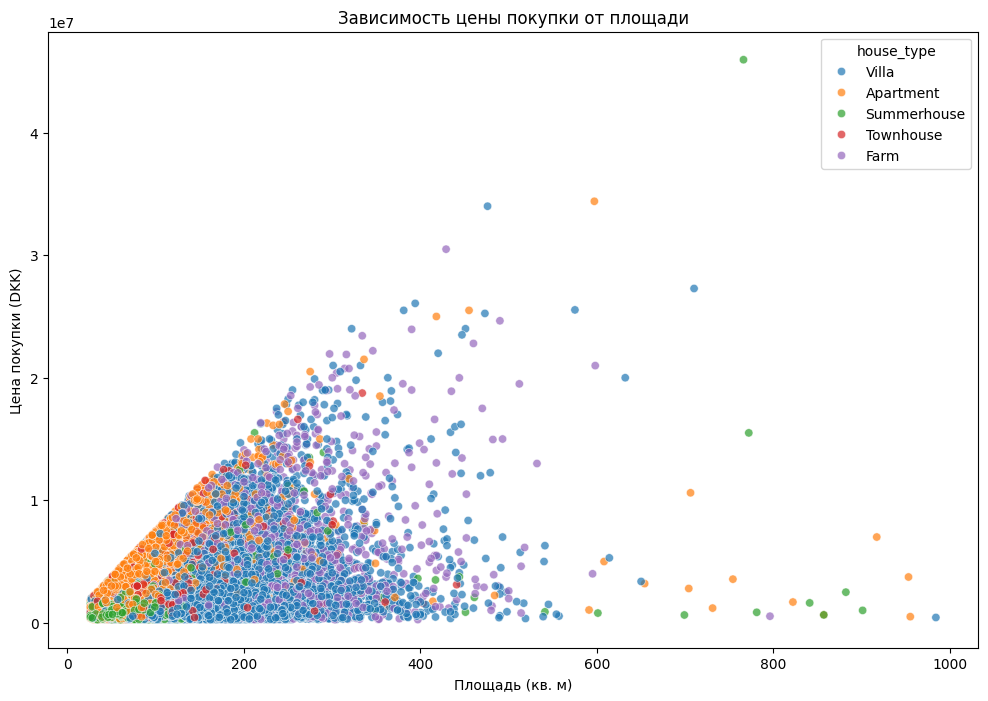

In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x=data["sqm"], y=data["purchase_price"], hue=data["house_type"], alpha=0.7)
plt.title("Зависимость цены покупки от площади")
plt.xlabel("Площадь (кв. м)")
plt.ylabel("Цена покупки (DKK)")
plt.show()


Зависимость цены покупки от площади (диаграмма рассеивания или скаттерплот)
На графике мы видим, как меняется цена покупки в зависимости от площади жилья. Точки окрашены в зависимости от типа дома. Цена увеличивается с ростом площади.
Но для некоторых типов жилья (например, летние дома или фермы) цена не всегда пропорциональна площади. Это может быть связано с местоположением, состоянием недвижимости или другими факторами.
Тип дома играет роль: например, фермы и виллы чаще имеют высокие цены при большой площади, тогда как апартаменты имеют в основном небольшую площадь и остаются дешевле. Также на графике есть выбросы и мы видим, что существуют, например, летние дома с очень большой площадью и маленькой стоимостью при этом

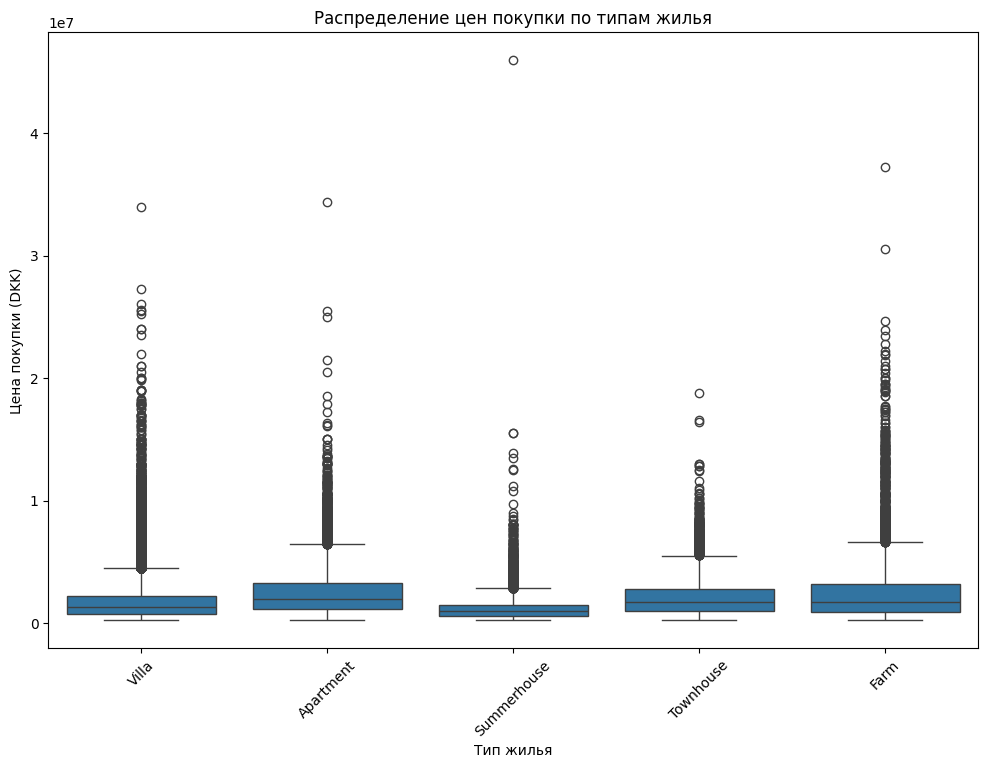

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="house_type", y="purchase_price", data=data)
plt.title("Распределение цен покупки по типам жилья")
plt.xlabel("Тип жилья")
plt.ylabel("Цена покупки (DKK)")
plt.xticks(rotation=45)
plt.show()


Распределение цен покупки по типам жилья( Ящик с усами). Делаем вывод, что Апартаменты и фермы — самые дорогие типы жилья, с большим разбросом цен и множеством выбросов, что подтверждает их разнообразие.
Летние дома и таунхаусы — наиболее доступные, с низкими ценами и меньшим разбросом.
Виллы — находятся между этими крайностями, но имеют очень много выбросов.

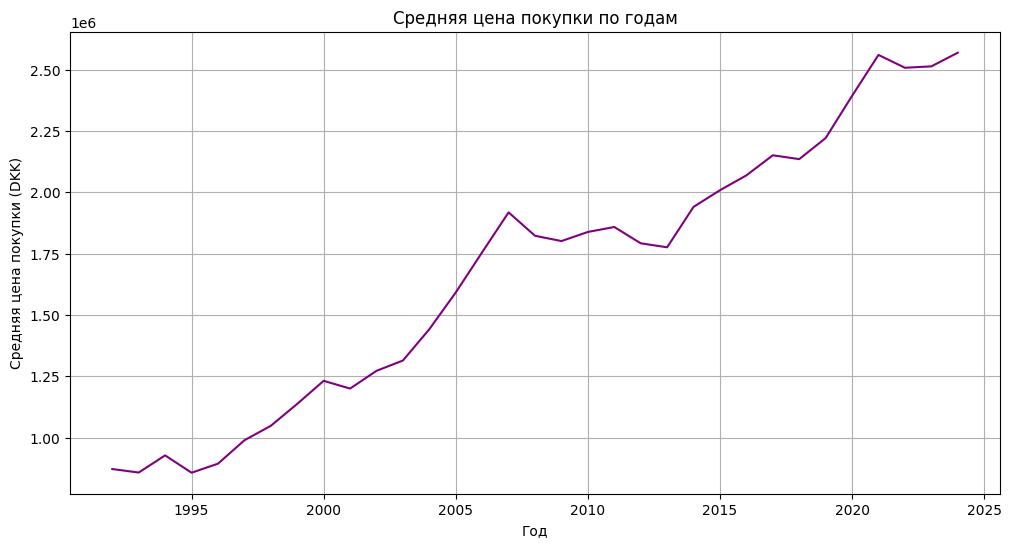

In [ ]:
data["year"] = pd.to_datetime(data["date"]).dt.year
yearly_trend = data.groupby("year")["purchase_price"].mean()

plt.figure(figsize=(12, 6))
yearly_trend.plot(kind="line", color="purple")
plt.title("Средняя цена покупки по годам")
plt.xlabel("Год")
plt.ylabel("Средняя цена покупки (DKK)")
plt.grid(True)
plt.show()


Средняя цена покупки по годам(линейная диаграмма) Показывает, что с каждым годом цены только растут, однако бывали года, когда цены падали, но затем снова возрастали

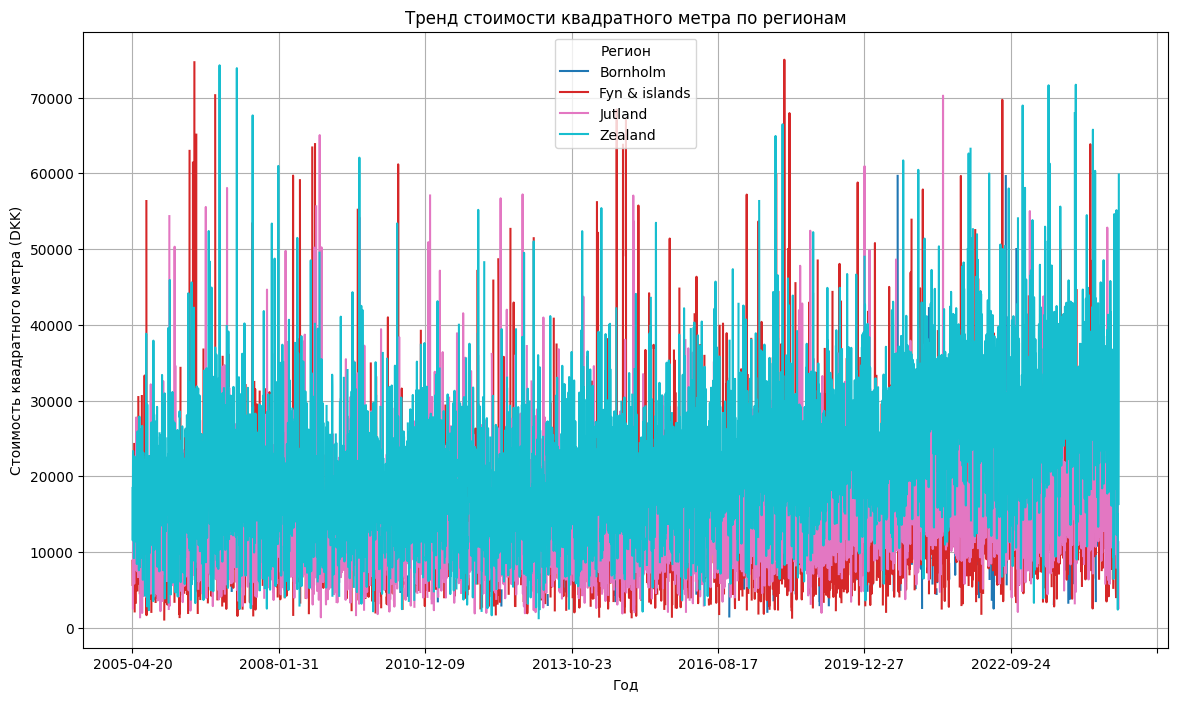

In [ ]:
region_yearly_trend = data.groupby(["date", "region"])["sqm_price"].mean().unstack()
region_yearly_trend.plot(kind="line", figsize=(14, 8), colormap="tab10")
plt.title("Тренд стоимости квадратного метра по регионам")
plt.xlabel("Год")
plt.ylabel("Стоимость квадратного метра (DKK)")
plt.grid(True)
plt.legend(title="Регион")
plt.show()


Тренд стоимости квадратного метра по регионам(линейная диаграмма). Можно сделать вывод, что в регионах Fyn&islands в среднем выше стоимость жилья и растет стремительнее, чем в остальных регионах

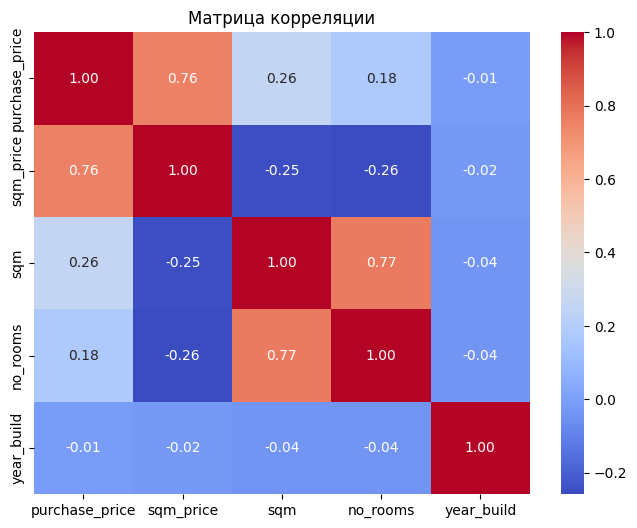

In [ ]:
numeric_cols = data[["purchase_price", "sqm_price", "sqm", "no_rooms", "year_build"]]
correlation = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляции")
plt.show()


Матрица кореляции. Корреляция происходит между purchase_price — цена покупки.
sqm_price — цена за квадратный метр.
sqm — общая площадь недвижимости.
no_rooms — количество комнат.
year_build — год постройки. Делаем выводы, что выше всего значения корреляции между цена покупки и цена за квадратный метр,  общая площадь недвижимости и количество комнат.

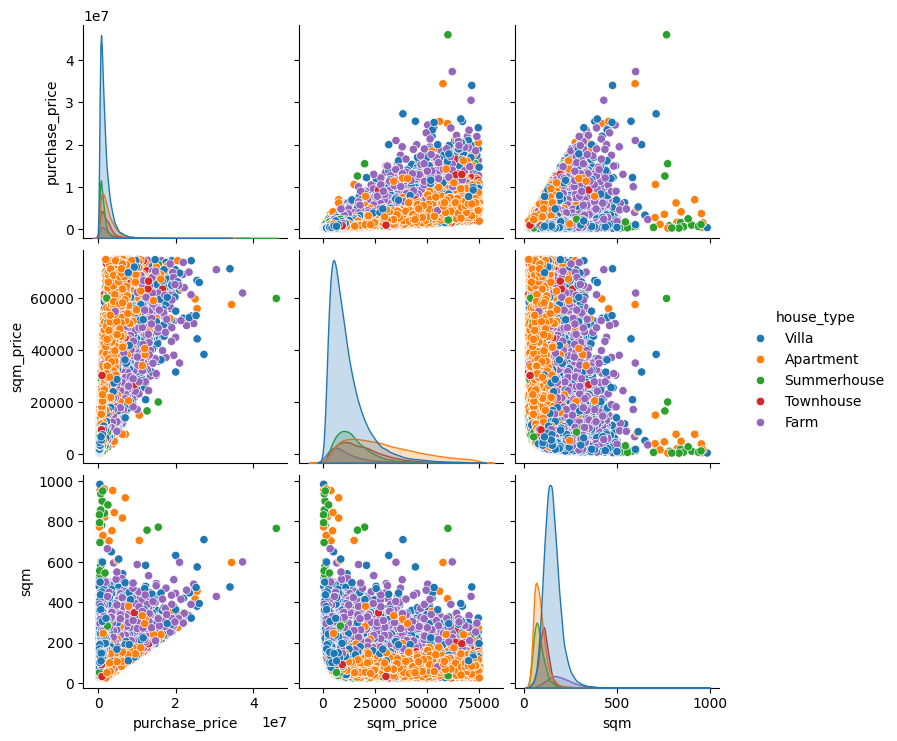

In [ ]:
sns.pairplot(data, vars=["purchase_price", "sqm_price", "sqm"], hue="house_type")
plt.show()


График парных зависимостей  Гистограммы (распределения) признаков:
Можем увидеть распределения каждого признака, такие как:
purchase_price: Распределение цен покупки — показывает, как часто встречаются дома с определенной ценой.
sqm_price: Распределение стоимости квадратного метра.
sqm: Распределение общей площади.
Диаграммы рассеяния (scatter plots):
Эти графики показывают взаимосвязь между парами признаков. Например:

purchase_price и sqm_price:
Можно увидеть, что растет  цена покупки с увеличением стоимости квадратного метра.
purchase_price и sqm:
Показывает, что увеличивается  цена с ростом площади недвижимости.


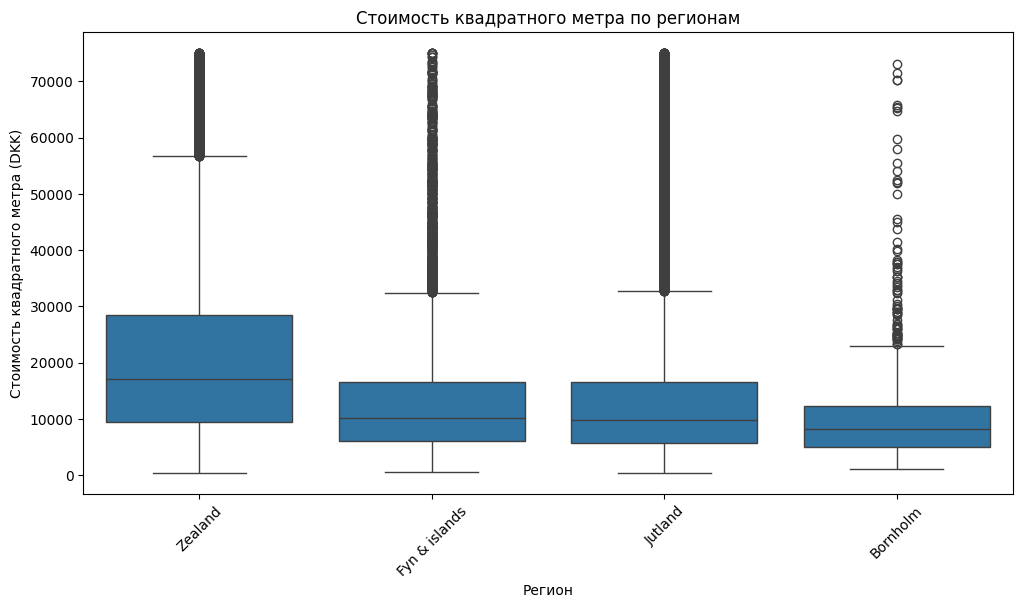

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="region", y="sqm_price", data=data)
plt.title("Стоимость квадратного метра по регионам")
plt.xlabel("Регион")
plt.ylabel("Стоимость квадратного метра (DKK)")
plt.xticks(rotation=45)
plt.show()


Стоимость квадратного метра по регионам( Ящик с усами). Показывает, что самый большой разброс цен за стоимость кв.метра в регионе Зеландия и самые высокие цены по медиане


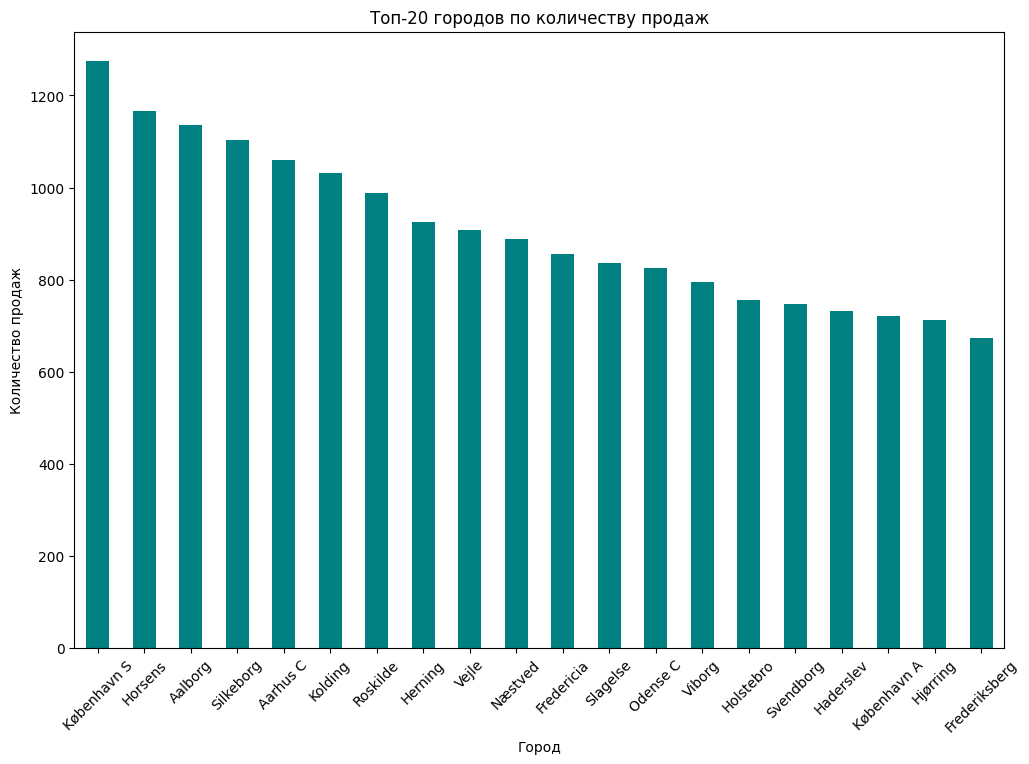

In [ ]:
city_sales = data["city"].value_counts().nlargest(20)

plt.figure(figsize=(12, 8))
city_sales.plot(kind="bar", color="teal")
plt.title("Топ-20 городов по количеству продаж")
plt.xlabel("Город")
plt.ylabel("Количество продаж")
plt.xticks(rotation=45)
plt.show()


Топ-20 городов по количеству продаж(гистограмма) Показывает, что самый популярный город у покупателей недвижимости - København SV

Вывод: В ходе лабораторной работы были построены графики распределений различных признаков.
 1) Столбчатая диаграмма, которая показывает сколько раз уникальное значение area встречается в таблице, можно сделать вывод, что чаще всего жилье покупают в south Jutland, а реже - в Bornholm.
 2) Распределение цен покупки (гистограмма), На графике видно, как распределены цены покупки жилья (в датских кронах), можно сделать вывод, что большинство сделок было совершено за низкие суммы, что может говорить о популярности более доступного жилья и чем выше стоимость, тем популярность стремительнее падает.
2.1) Стоимость за квадратный метр(гистрограмма), На графике видно, что большинство сделок было совершено с жильем, у которого цена за квадратный метр меньше, чем выше стоимость за квадратный метр, тем меньше колличество сделок
3) Гистограмма, распределение типов жилья по частоте покупок. На графике видно, что чаще всего покупают виллы, а реже всего - фермы
4) Средняя цена за квадратный метр в зависимости от региона(гистограмма). Сделаем вывод по графику, что самый дорогой квадратный метр в столице, Копенгагене, а самый дешевый на острове Борнхольм.
5) Зависимость цены покупки от площади (диаграмма рассеивания или скаттерплот)
На графике мы видим, как меняется цена покупки в зависимости от площади жилья. Точки окрашены в зависимости от типа дома. Цена увеличивается с ростом площади.
Но для некоторых типов жилья (например, летние дома или фермы) цена не всегда пропорциональна площади. Это может быть связано с местоположением, состоянием недвижимости или другими факторами.
Тип дома играет роль: например, фермы и виллы чаще имеют высокие цены при большой площади, тогда как апартаменты имеют в основном небольшую площадь и остаются дешевле. Также на графике есть выбросы и мы видим, что существуют, например, летние дома с очень большой площадью и маленькой стоимостью при этом.
6) Распределение цен покупки по типам жилья( Ящик с усами). Делаем вывод, что Апартаменты и фермы — самые дорогие типы жилья, с большим разбросом цен и множеством выбросов, что подтверждает их разнообразие.
Летние дома и таунхаусы — наиболее доступные, с низкими ценами и меньшим разбросом.
Виллы — находятся между этими крайностями, но имеют очень много выбросов.
7) Средняя цена покупки по годам(линейная диаграмма) Показывает, что с каждым годом цены только растут, однако бывали года, когда цены падали, но затем снова возрастали
8) Тренд стоимости квадратного метра по регионам(линейная диаграмма). Можно сделать вывод, что в регионах Fyn&islands в среднем выше стоимость жилья и растет стремительнее, чем в остальных регионах
9) Матрица кореляции. Корреляция происходит между purchase_price — цена покупки.
sqm_price — цена за квадратный метр.
sqm — общая площадь недвижимости.
no_rooms — количество комнат.
year_build — год постройки. Делаем выводы, что выше всего значения корреляции между цена покупки и цена за квадратный метр,  общая площадь недвижимости и количество комнат.
10) График парных зависимостей  Гистограммы (распределения) признаков:
Можем увидеть распределения каждого признака, такие как:
purchase_price: Распределение цен покупки — показывает, как часто встречаются дома с определенной ценой.
sqm_price: Распределение стоимости квадратного метра.
sqm: Распределение общей площади.
Диаграммы рассеяния (scatter plots):
Эти графики показывают взаимосвязь между парами признаков. Например:
purchase_price и sqm_price:
Можно увидеть, что растет  цена покупки с увеличением стоимости квадратного метра.
purchase_price и sqm:
Показывает, что увеличивается  цена с ростом площади недвижимости.
11) Стоимость квадратного метра по регионам( Ящик с усами). Показывает, что самый большой разброс цен за стоимость кв.метра в регионе Зеландия и самые высокие цены по медиане
12) Топ-20 городов по количеству продаж(гистограмма) Показывает, что самый популярный город у покупателей недвижимости - København SV
